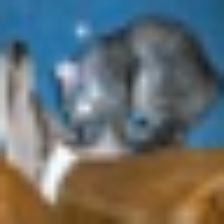

In [4]:
import torch
import torchvision
import cv2
import numpy as np
from torchvision.models.detection import FasterRCNN_ResNet50_FPN_Weights
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load model
weights = FasterRCNN_ResNet50_FPN_Weights.DEFAULT
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights=weights)
model.eval()

# Load CIFAR dataset
dataset = torchvision.datasets.CIFAR10(
    root="./data",
    train=False,
    download=True
)

# Pick one image
img_pil, label = dataset[0]

# Convert PIL → OpenCV
img = np.array(img_pil)
img = cv2.resize(img, (224, 224))

# Convert to tensor
img_tensor = torch.from_numpy(img).permute(2, 0, 1).float() / 255.0
img_tensor = img_tensor.unsqueeze(0)

# Inference
with torch.no_grad():
    outputs = model(img_tensor)

# Draw detections
for box, score in zip(outputs[0]['boxes'], outputs[0]['scores']):
    if score > 0.5:
        x1, y1, x2, y2 = box.int().tolist()
        cv2.rectangle(img, (x1,y1), (x2,y2), (0,255,0), 2)

cv2_imshow(img)